## 2 Pricing Factors and Assets
4 Factors
- Market: MKT
- Size: SMB (Small Minus Big)
- Value: HML (High Minus Low)
- Momentum: UMD (Up Minus Down)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import seaborn as sns
sns.set_theme(style='white', palette='cubehelix', font_scale = 1.2, rc={'figure.figsize': (8, 6)})


#### 1.	The Factors. Calculate their univariate performance statistics:
- mean
- volatility
- Sharpe
- VaR(.05)
Does each factor have a premium (positive expected excess return)?

In [85]:
df_factors = pd.read_excel('factor_pricing_data.xlsx', sheet_name="factors (excess)", parse_dates=True, index_col=0)
df_factors.head()

,MKT,SMB,HML,UMD
Date,,,,
1990-01-31,-0.0785,-0.0124,0.0085,-0.0327
1990-02-28,0.0111,0.0099,0.0064,-0.0055
1990-03-31,0.0183,0.0150,-0.0292,0.0180
1990-04-30,-0.0336,-0.0046,-0.0259,0.0239
1990-05-31,0.0842,-0.0253,-0.0383,0.0303


In [86]:
df_new = pd.DataFrame(index=df_factors.columns)
df_new.loc[:, 'Mean'] = df_factors.mean() * 12

In [87]:
df_new.loc[:, 'Volatility'] = df_factors.std() * np.sqrt(12)

In [88]:
df_new.loc[:, 'Sharpe'] = df_factors.mean(numeric_only=True)/df_factors.std() * np.sqrt(12)

In [89]:
df_new.loc[:, 'VaR'] = df_factors.quantile(0.05)

In [90]:
df_new.head()

,Mean,Volatility,Sharpe,VaR
MKT,0.0820,0.1540,0.5326,-0.0785
SMB,0.0108,0.1094,0.0991,-0.0431
HML,0.0165,0.1134,0.1453,-0.0419
UMD,0.0541,0.1642,0.3298,-0.0729


In [91]:
df_new.Mean > 0

MKT    True
SMB    True
HML    True
UMD    True
Name: Mean, dtype: bool

Each factor has a premium (positive expected excess return).

#### 2.
The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors.
Does the construction method succeed in keeping correlations small?

In [92]:
corr_matrix = df_factors.corr()
corr_matrix

,MKT,SMB,HML,UMD
MKT,1.0000,0.2370,-0.1182,-0.2896
SMB,0.2370,1.0000,-0.2115,-0.0073
HML,-0.1182,-0.2115,1.0000,-0.1929
UMD,-0.2896,-0.0073,-0.1929,1.0000


<AxesSubplot:>

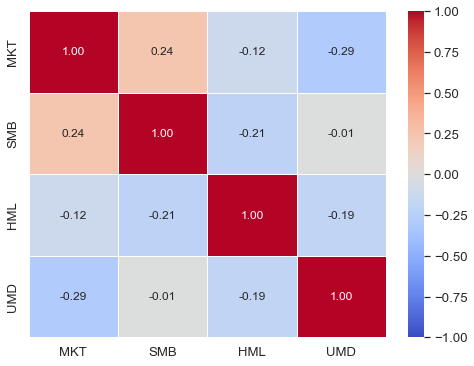

In [93]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, annot_kws={'size': 12}, vmin=-1, vmax=1, fmt=".2f")

Since the correlation between the factors is small, the factors are independent of each other.
The correlation matrix shows that the construction method succeeds in keeping correlations small.

#### 3
Plot the cumulative returns of the factors.

In [94]:
df_factors_cum = (df_factors + 1).cumprod() - 1
df_factors_cum.head()

,MKT,SMB,HML,UMD
Date,,,,
1990-01-31,-0.0785,-0.0124,0.0085,-0.0327
1990-02-28,-0.0683,-0.0026,0.0150,-0.0380
1990-03-31,-0.0512,0.0123,-0.0147,-0.0207
1990-04-30,-0.0831,0.0077,-0.0402,0.0027
1990-05-31,-0.0059,-0.0178,-0.0770,0.0331


<AxesSubplot:xlabel='Date'>

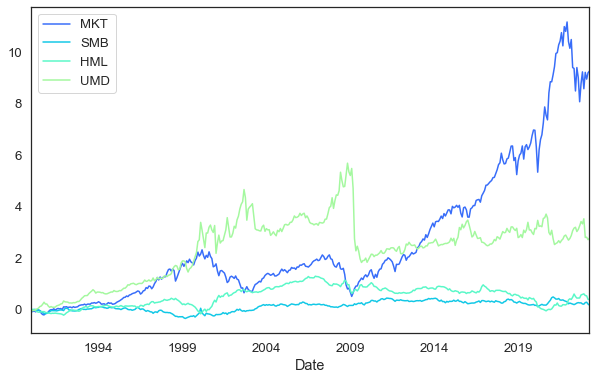

In [95]:
df_factors_cum.plot(figsize = (10, 6))

#### 4. Test assets.
The “assets” tab provides monthly excess return data on various industry stock-portfolios. Denote these as ri, for n = 1, . . . , 12.
Calculate the (annualized) univariate statistics from 1.1.

In [96]:
df_assets = pd.read_excel('factor_pricing_data.xlsx', sheet_name="assets (excess)", parse_dates=True, index_col=0)
df_assets.head()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
1990-01-31,-0.1000,-0.0441,-0.0618,-0.0487,-0.0862,-0.0182,-0.1396,-0.0592,-0.0700,-0.0793,-0.1035,-0.0789
1990-02-28,-0.0096,0.0456,0.0214,0.0253,0.0161,0.0345,-0.0092,-0.0036,0.0142,-0.0263,0.0175,0.0238
1990-03-31,0.0390,0.0226,0.0396,-0.0121,0.0158,0.0383,0.0354,-0.0139,0.0447,0.0321,-0.0220,0.0128
1990-04-30,-0.0096,-0.0473,-0.0365,-0.0423,-0.0285,-0.0271,-0.0415,-0.0620,-0.0279,-0.0040,-0.0492,-0.0290
1990-05-31,0.0836,0.0708,0.0707,0.0535,0.0825,0.1188,0.0870,0.0475,0.1097,0.1209,0.0858,0.0820


In [97]:
df_assets_annualized = pd.DataFrame(index=df_assets.columns)
df_assets_annualized.loc[:, 'Annualized Mean'] = df_assets.mean() * 12
df_assets_annualized.loc[:,'Annualized Volatility'] = df_assets.std() * np.sqrt(12)
df_assets_annualized.loc[:, 'Annualized Sharpe'] = df_assets.mean(numeric_only=True) / df_assets.std() * np.sqrt(12)
df_assets_annualized.loc[:,'Annualized VaR'] = df_assets.quantile(0.05)

In [98]:
display(df_assets_annualized)

,Annualized Mean,Annualized Volatility,Annualized Sharpe,Annualized VaR
NoDur,0.0837,0.1329,0.6299,-0.0576
Durbl,0.0950,0.2831,0.3355,-0.1163
Manuf,0.0999,0.1879,0.5316,-0.0867
Enrgy,0.0904,0.2258,0.4003,-0.0958
Chems,0.0822,0.1497,0.5492,-0.0729
BusEq,0.1223,0.2360,0.5179,-0.1112
Telcm,0.0518,0.1787,0.2898,-0.0900
Utils,0.0723,0.1401,0.5160,-0.0638
Shops,0.0938,0.1636,0.5732,-0.0771
Hlth,0.0957,0.1529,0.6257,-0.0709


##### 5.
Can the difference in mean excess returns of the portfolios be explained by differences in their volatilises? Or by their VaR(.05) statistics?

<AxesSubplot:>

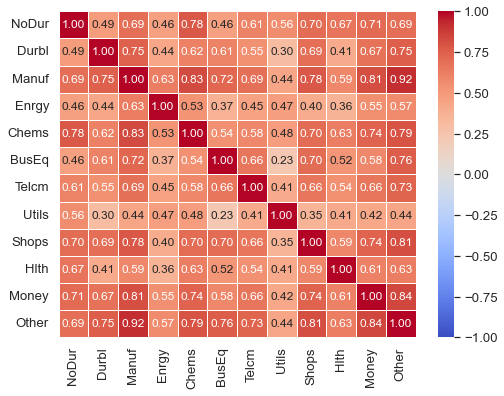

In [99]:
sns.heatmap(df_assets.corr(), annot=True, cmap='coolwarm', linewidths=0.8, annot_kws={'size': 12}, vmin=-1, vmax=1, fmt=".2f")

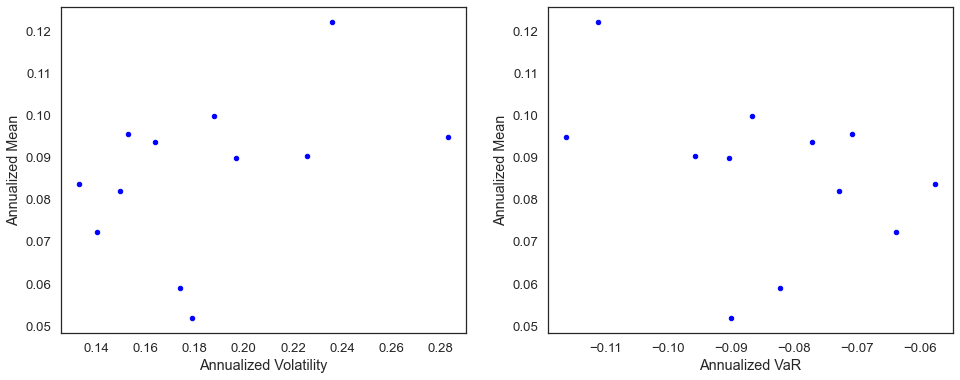

In [100]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))
df_assets_annualized.plot.scatter('Annualized Volatility', 'Annualized Mean', ax = ax[0], color = 'blue')
df_assets_annualized.plot.scatter('Annualized VaR', 'Annualized Mean', ax = ax[1], color = 'blue')
plt.show()

Portfolio volatilises alone could not explain the difference in mean excess return.
Neither the mean-volatility plot (left) nor the mean-VaR plot (right) supports this.
Thus, this shows we cannot use a simple rule of thumb to generalize.

### 3. Capital Asset Pricing Model (CAPM)

The CAPM asserts that an asset (or portfolio's) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)

Specifically, it asserts that, for any excess return, $\tilde{r}^{i}$, its mean is proportional to the mean excess return of the market, $\tilde{f}^{\mathrm{mkt}}$, where the proportionality is the regression beta of $\tilde{r}^{i}$ on $\tilde{f}^{\mathrm{mkt}}$.

$$
\mathbb{E}\left[\tilde{r}_{t}^{i}\right]=\beta^{i, \mathrm{mkt}} \mathbb{E}\left[\tilde{f}_{t}^{\mathrm{mkt}}\right]
$$

Let's examine whether that seems plausible.

1. For each of the $n=12$ test assets, run the CAPM time-series regression:

In [101]:
from statistics import LinearRegression


def get_ols_metrics(regressors, targets, annualization=1, ignorenan=True):
    # ensure regressors and targets are pandas dataframes, as expected
    if not isinstance(regressors, pd.DataFrame):
        regressors = regressors.to_frame()
    if not isinstance(targets, pd.DataFrame):
        targets = targets.to_frame()

    # align the targets and regressors on the same dates
    df_aligned = targets.join(regressors, how='inner', lsuffix='y ')
    Y = df_aligned[targets.columns]
    Xset = df_aligned[regressors.columns]

    reg = pd.DataFrame(index=targets.columns)
    for col in Y.columns:
        y = Y[col]

        if ignorenan:
            # ensure we use only non-NaN dates
            alldata = Xset.join(y,lsuffix='X')
            mask = alldata.notnull().all(axis=1)
            y = y[mask]
            X = Xset[mask]
        else:
            X = Xset

        model = LinearRegression().fit(X, y)
        reg.loc[col, 'alpha'] = model.intercept_ * annualization
        reg.loc[col, regressors.columns] = model.coef_
        reg.loc[col, 'r-squared'] = model.score(X, y)

        # sklearn does not return the residuals, so we need to build them
        yfit = model.predict(X)
        residuals = y - yfit

        # Treynor Ratio is only defined for univariate regression
        if Xset.shape[1] == 1:
            reg.loc[col,'Treynor Ratio'] = (y.mean() / model.coef_) * annualization


        # if intercept =0, numerical roundoff will nonetheless show nonzero Info Ratio
        num_roundoff = 1e-12
        if np.abs(model.intercept_) < num_roundoff:
            reg.loc[col, 'Info Ratio'] = None
        else:
            reg.loc[col, 'Info Ratio'] = (model.intercept_ / residuals.std()) * np.sqrt(annualization)

    return reg

In [102]:
capm_ts = get_ols_metrics(df_factors.MKT, df_assets, annualization=12, ignorenan=True)

In [103]:
display(capm_ts)

,alpha,MKT,r-squared,Treynor Ratio,Info Ratio
NoDur,0.0318,0.6325,0.5375,0.1323,0.3521
Durbl,-0.0177,1.3740,0.5590,0.0691,-0.0944
Manuf,0.0089,1.1089,0.8266,0.0901,0.1138
Enrgy,0.0194,0.8657,0.3488,0.1044,0.1063
Chems,0.0191,0.7691,0.6265,0.1069,0.2089
BusEq,0.0136,1.3243,0.7468,0.0923,0.1146
Telcm,-0.0243,0.9276,0.6390,0.0558,-0.2263
Utils,0.0374,0.4249,0.2184,0.1701,0.3021
Shops,0.0196,0.9046,0.7251,0.1037,0.2282
Hlth,0.0378,0.7056,0.5052,0.1356,0.3514


2. For each regression, report the estimated $\alpha$ and $\mathrm{r}$-squared.

In [104]:
display(capm_ts)

,alpha,MKT,r-squared,Treynor Ratio,Info Ratio
NoDur,0.0318,0.6325,0.5375,0.1323,0.3521
Durbl,-0.0177,1.3740,0.5590,0.0691,-0.0944
Manuf,0.0089,1.1089,0.8266,0.0901,0.1138
Enrgy,0.0194,0.8657,0.3488,0.1044,0.1063
Chems,0.0191,0.7691,0.6265,0.1069,0.2089
BusEq,0.0136,1.3243,0.7468,0.0923,0.1146
Telcm,-0.0243,0.9276,0.6390,0.0558,-0.2263
Utils,0.0374,0.4249,0.2184,0.1701,0.3021
Shops,0.0196,0.9046,0.7251,0.1037,0.2282
Hlth,0.0378,0.7056,0.5052,0.1356,0.3514


3. If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

1. Equal Treynor Ratios (TR)  across all assets:
    - According to CAPM, the expected return of an asset should be proportional to its beta (i.e., its systematic risk relative to the market). TR is used to assess risk-adjusted returns and measures excess return per unit of beta. Under CAPM, after adjusting for beta, all assets should deliver the same excess return, equivalent to the market risk premium.
2. Zero Alpha
    - Alpha measures how much an investment's outperforms or underperforms a benchmark. It should be zero if CAPM holds as CAPM says that an asset's expected returns can be entirely explained by its systematic risk (beta) and the market premium.
3. Zero Information Ratio (IR):
   - IR quantifies the amount of active return of a portfolio per unit of active risk taken that is not captured by beta. When CAPM holds, any deviation from the market portfolio shouldn't yield any additional returns since all necessary information to forecast returns is contained within beta and the market premium.

4. Calculate the mean-absolute-error of the estimated alphas, (one for each security, $\tilde{r}^{i}$.)

In [105]:
print(f"MAE = {capm_ts.alpha.abs().mean():.4f}")

MAE = 0.0215


### 4 A multifactor model

Perhaps expected excess returns are determined by multiple factors, not just the market factor as hypothesized by the CAPM. Try the following 4-factor model:

$$
\mathbb{E}\left[\tilde{r}^{i}\right]=\beta^{i, \mathrm{mkt}} \mathbb{E}\left[\tilde{f}^{\mathrm{mkt}}\right]+\beta^{i, \mathrm{smb}} \mathbb{E}\left[\tilde{f}^{\mathrm{smb}}\right]+\beta^{i, \mathrm{hml}} \mathbb{E}\left[\tilde{f}^{\mathrm{hm} l}\right]+\beta^{i, \mathrm{umd}} \mathbb{E}\left[\tilde{f}^{\mathrm{umd}}\right]
$$

Let's use regression methods to test whether the selected four pricing factors work. For each equity security, estimate the following regression to test the 4-factor model:

$$
\tilde{r}_{t}^{i}=\alpha^{i}+\beta^{i, \mathrm{mkt}} \tilde{f}_{t}^{\mathrm{mkt}}+\beta^{i, \mathrm{smb}} \tilde{f}_{t}^{\mathrm{smb}}+\beta^{i, \mathrm{hml}} \tilde{f}_{t}^{\mathrm{hml}}+\beta^{i, \mathrm{umd}} \tilde{f}_{t}^{\mathrm{umd}}+\epsilon_{t}
$$

So you are running that regression 12 times, once for each security, $\tilde{r}^{i}$.

1. For each regression, report the estimated $\alpha$ and $\mathrm{r}$-squared.

2. Calculate the mean-absolute-error of the estimated alphas, (one for each security, $\tilde{r}^{i}$.)

$$
\mathrm{MAE}=\frac{1}{n} \sum_{i=1}^{n}\left|\hat{\alpha}^{i}\right|
$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?


In [106]:
df_mfm = get_ols_metrics(df_factors, df_assets, annualization=12, ignorenan=True)

In [107]:
display(df_mfm)

,alpha,MKT,SMB,HML,UMD,r-squared,Info Ratio
NoDur,0.0251,0.6937,-0.2299,0.1765,0.0233,0.6022,0.2997
Durbl,0.0026,1.2499,0.2787,0.2745,-0.3274,0.6175,0.0150
Manuf,0.0080,1.0955,0.0987,0.2745,-0.0670,0.8604,0.1146
Enrgy,0.0003,0.9223,0.0905,0.7077,0.0334,0.4660,0.0017
Chems,0.0145,0.8140,-0.1792,0.2072,-0.0105,0.6756,0.1703
BusEq,0.0369,1.2094,0.1743,-0.6241,-0.1014,0.8446,0.3968
Telcm,-0.0205,0.9366,-0.1520,0.0037,-0.0547,0.6502,-0.1939
Utils,0.0206,0.5257,-0.2350,0.2961,0.1149,0.3218,0.1785
Shops,0.0226,0.8980,-0.0305,-0.0325,-0.0292,0.7264,0.2638
Hlth,0.0335,0.7539,-0.1991,-0.1273,0.0839,0.5379,0.3227


In [108]:
print(f"MAE = {df_mfm.alpha.abs().mean():.4f}")

MAE = 0.0184
